In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer

### 0. print current working directory
The dataset in working directory

In [138]:
print(os.getcwd())

/Users/deng/ws/misc/da_assignment


### <span style="color:blue">1. Load the dataset. (1)</span>

In [139]:
df = pd.read_csv('Life_Expectancy_Data.csv')

### 2. Display the first 20 rows. (1)

In [140]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


### 3. Find the number of null values in the dataset. (1)

In [141]:
# It will be used in the folloing tasks, so I define a function
def null_info(df):
    null_counts = df.isna().sum()
    total_null = null_counts.sum()
    print(f'Total number of null values: {total_null}')
    return null_counts

null_info(df)

Total number of null values: 2563


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### 4. Impute the missing values with the mean values of the data. You can use SimpleImputer from sklearn.impute. (1) 
Bonus: Instead of imputing the missing values with the mean value of the whole column, impute it with the mean value of the column that corresponds to the country. (1 bonus point)

In [142]:
# before imputing, display 10 rows with null values
null_rows = df[df.isna().any(axis=1)].head(10)
null_rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9


In [143]:
# Imputing the missing values with the mean value of the whole column
mean_imputer = SimpleImputer(strategy='mean')

df_copy = df.copy(deep=True)

numeric_columns = df_copy.select_dtypes(include=[np.number])
df_copy[numeric_columns.columns] = mean_imputer.fit_transform(numeric_columns)

In [144]:
# No any null values is expected result
null_info(df_copy)

Total number of null values: 0


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [145]:
# check the imputing result
df_copy[df_copy['Country'].isin(null_rows['Country'])].head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015.0,Developing,75.6,19.0,21.0,4.602861,0.000000,95.0,63.0,...,95.0,5.93819,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
33,Algeria,2014.0,Developing,75.4,11.0,21.0,0.010000,54.237318,95.0,0.0,...,95.0,7.21000,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013.0,Developing,75.3,112.0,21.0,0.530000,544.450743,95.0,25.0,...,95.0,7.12000,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012.0,Developing,75.1,113.0,21.0,0.660000,555.926083,95.0,18.0,...,95.0,6.14000,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011.0,Developing,74.9,116.0,21.0,0.560000,509.002041,95.0,112.0,...,95.0,5.29000,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010.0,Developing,74.7,119.0,21.0,0.450000,430.717586,95.0,103.0,...,95.0,5.12000,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009.0,Developing,74.4,123.0,20.0,0.500000,352.063642,94.0,107.0,...,94.0,5.36000,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008.0,Developing,74.1,126.0,20.0,0.460000,43.087173,91.0,217.0,...,92.0,4.20000,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007.0,Developing,73.8,129.0,20.0,0.440000,320.323924,9.0,0.0,...,95.0,3.82000,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006.0,Developing,73.4,132.0,20.0,0.360000,270.240196,8.0,944.0,...,95.0,3.36000,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3


In [161]:
# impute null values with the mean value of the column that corresponds to the country
df_copy = df.copy(deep=True)

numeric_columns = df_copy.select_dtypes(include=[np.number])

impute_group_mean = lambda x: x.fillna(x.mean())

df_copy[numeric_columns.columns] = df_copy.groupby('Country')[numeric_columns.columns].apply(impute_group_mean).reset_index(drop=True)

# for some countries with null group mean
df_copy[numeric_columns.columns] = mean_imputer.fit_transform(numeric_columns)

In [162]:
null_info(df_copy)

Total number of null values: 0


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [117]:
df_copy[df_copy['Country'].isin(null_rows['Country'])].head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,0.406667,0.000000,95.0,63,...,95.0,4.604,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
33,Algeria,2014,Developing,75.4,11.0,21,0.010000,54.237318,95.0,0,...,95.0,7.210,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013,Developing,75.3,112.0,21,0.530000,544.450743,95.0,25,...,95.0,7.120,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012,Developing,75.1,113.0,21,0.660000,555.926083,95.0,18,...,95.0,6.140,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011,Developing,74.9,116.0,21,0.560000,509.002041,95.0,112,...,95.0,5.290,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010,Developing,74.7,119.0,21,0.450000,430.717586,95.0,103,...,95.0,5.120,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009,Developing,74.4,123.0,20,0.500000,352.063642,94.0,107,...,94.0,5.360,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008,Developing,74.1,126.0,20,0.460000,43.087173,91.0,217,...,92.0,4.200,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007,Developing,73.8,129.0,20,0.440000,320.323924,9.0,0,...,95.0,3.820,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006,Developing,73.4,132.0,20,0.360000,270.240196,8.0,944,...,95.0,3.360,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3


### 5. Find the count, mean, standard deviation, quartiles and extrema for the numeric columns. (1)

In [102]:
df_copy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [172]:
# I will use 'pf' as the dataset for folloing tasks
df = df_copy
df.columns = (df.columns.str.strip())

### 6. Find the correlation between the numeric columns and display your findings on a heatmap. (2)

### 7. Plot a histogram of the life expectancy. (2)

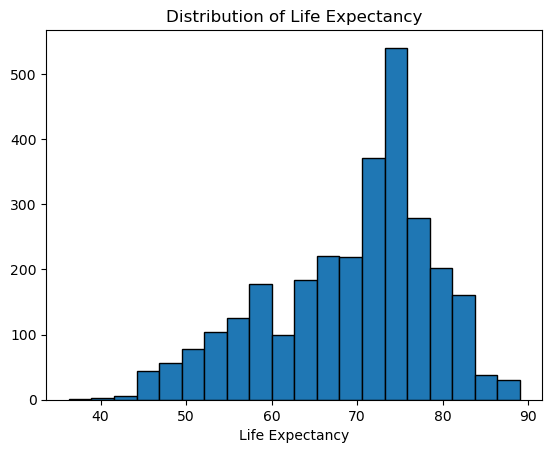

In [182]:
plt.hist(df["Life expectancy"], 20, edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()

### 8. Compamre the life expectancy in developed countries to that in developing countries using violin plots next to each other. (2)

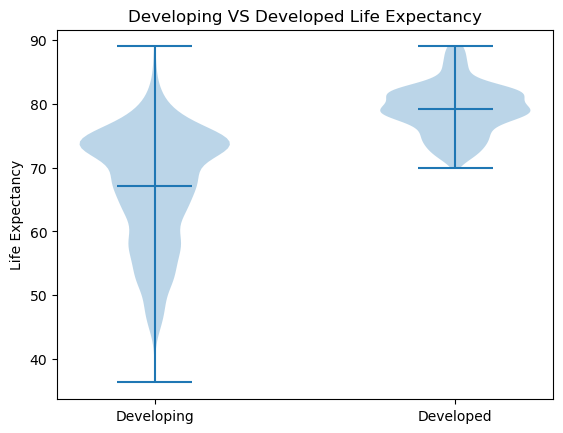

In [211]:
developed = df[df['Status'] == 'Developed']['Life expectancy']
developing = df[df['Status'] == 'Developing']['Life expectancy']
data = [developing, developed]
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2], ['Developing', 'Developed'])
plt.title('Developing VS Developed Life Expectancy')
plt.ylabel('Life Expectancy')
plt.show()

### 9. On the same line plot, display the life expectancy from 2000 to 2015 for Canada, the United Kingdom and the United States of America. (2)

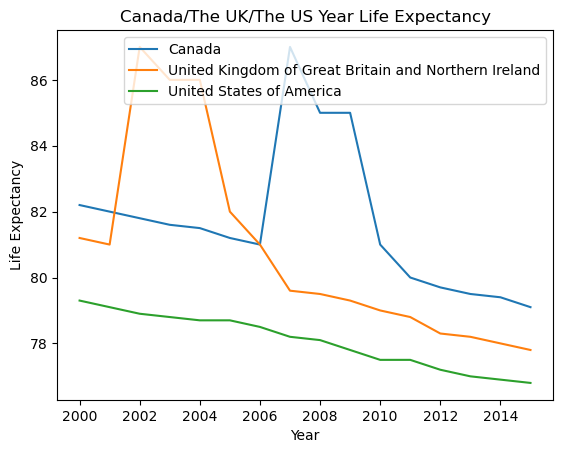

In [212]:
countries = ['Canada', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America']
start = 2000
end = 2015
for country in countries:
    data = df[(df['Country'] == country) & (df['Year'].between(start, end))]['Life expectancy']
    plt.plot(list(range(start, end + 1)), data, label=country)

plt.title('Canada/The UK/The US Year Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

### 10. Compare the average infant deaths over the years against the average life expectancy over the years using a scatter plot for the following countries: Belgium, Brazil, Cameroon, Canada, China, France, Ghana, India, the United Kingdom and the United States of America. What can you conclude? (2)

### 11. In the year 2012

#### 11.a. Compare the life expectancy with schooling using a scatter plot. (2) 

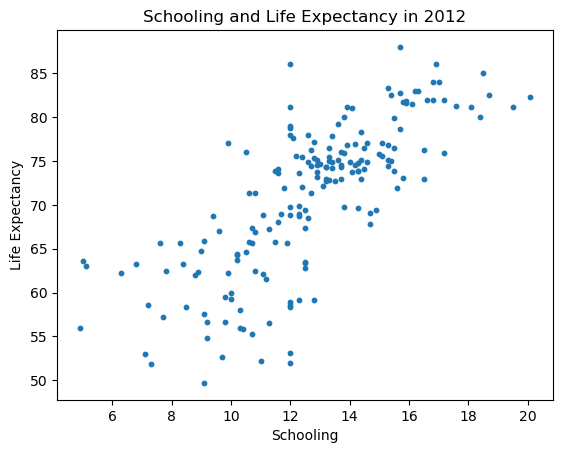

In [215]:
year = 2012
data = df[df['Year']==2012]
plt.scatter(data['Schooling'], data['Life expectancy'], 10)
plt.title('Schooling and Life Expectancy in ' + str(year))
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

#### 11.b. What is the Pearson correlation? (1)

The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

#### 11.c. Draw the best regression line on the same plot as (a). (1)

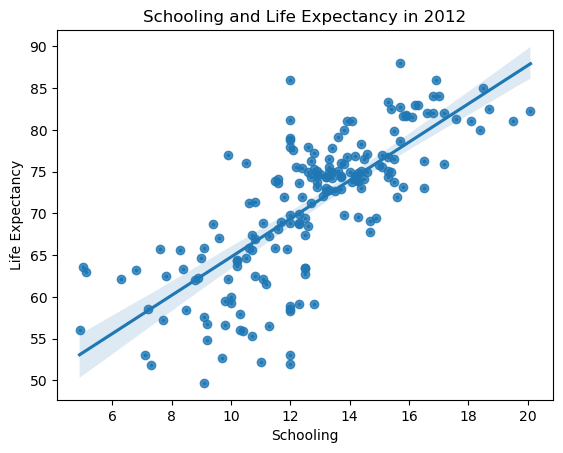

In [220]:
import seaborn as sns
year = 2012
data = df[df['Year']==2012]
plt.scatter(data['Schooling'], data['Life expectancy'], 3)
sns.regplot(x='Schooling', y='Life expectancy', data=data)
plt.title('Schooling and Life Expectancy in ' + str(year))
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

#### 11.d. What can you conclude? (1)

There is some correlation between schooling and life expectancy, but it is not very strong.